In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import pickle

In [60]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, MWETokenizer
from nltk.util import ngrams
import re
import string
from nltk.corpus import stopwords
from nltk.chunk import ne_chunk
set(stopwords.words('english'))
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [93]:
got = pickle.load(open( "got_reddit_cleaned.pkl", "rb" ) )
asoiaf = pickle.load(open( "soiaf_reddit_cleaned.pkl", "rb" ) )
freefolk = pickle.load(open( "freefolk_reddit_cleaned.pkl", "rb" ) )

In [62]:
got.head(5)

,Publish Date,body,sentiment,sentiment_compound,sentiment_sum,sentiment_mean
0,2019-03-31 17:00:15,"If you could only rewatch 15 episodes, which o...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...","[0.0, 0.3182, 0.7454]",1.0636,
1,2019-03-31 17:01:06,Just picked up my dragon glass dagger. Found i...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...","[0.0, 0.4199]",0.4199,
2,2019-03-31 17:02:11,*BOOK QUESTION* Who is the man without a face?...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...","[0.0, -0.6486, 0.4019, 0.4019]",0.1552,
3,2019-03-31 17:02:18,Got s6e10@47:44...is this shae?,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",[0.0],0,
4,2019-03-31 17:09:58,"I don't have enough time to binge 7 seasons, s...","[{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'com...","[0.3134, 0.0, 0.2023, 0.6705, 0.8847, 0.6369, ...",2.1365,


In [63]:
asoiaf.head(5)

,Publish Date,body,sentiment,sentiment_compound,sentiment_sum,sentiment_mean
0,2019-03-31 17:03:10,An Inconsistensy With Castle Black's Importanc...,"[{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'com...","[0.8442, 0.4215, 0.3612, 0.0, 0.0, 0.0, 0.0, 0...",1.777,
1,2019-03-31 17:04:47,Is Craster a King? Does he carry king's blood?...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6763, 0.4098...",10.6709,
2,2019-03-31 17:12:23,How will the living be able to defeat their en...,"[{'neg': 0.283, 'neu': 0.489, 'pos': 0.228, 'c...","[0.0, -0.6908, -0.6705, -0.7964, -0.3818, -0.6...",-4.2351,
3,2019-03-31 17:14:54,Game Of Thrones’ Final Books Could Pull Inspir...,"[{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'com...","[0.5267, 0.0]",0.5267,
4,2019-03-31 17:15:02,An Inconsistency With Castle Black's Significa...,"[{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'com...","[0.8271, 0.4215, 0.3612, 0.0, 0.0, 0.0, 0.0, 0...",1.7599,


In [64]:
freefolk.head(5)

,Publish Date,body,sentiment,sentiment_compound,sentiment_sum,sentiment_mean
0,2019-03-31 17:08:42,OPEN BIDDING/OPEN CALL: To anyone out there th...,"[{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compo...","[0.3182, -0.0772]",0.241,
1,2019-03-31 17:12:31,14days. A (fourth) quote a day,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...","[0.0, 0.0]",0,
2,2019-03-31 17:13:07,south park knows,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",[0.0],0,
3,2019-03-31 17:13:28,PORK SAUSAGE,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",[0.0],0,
4,2019-03-31 17:15:23,"Sunday times - ""In terms of the script, none o...","[{'neg': 0.132, 'neu': 0.76, 'pos': 0.108, 'co...","[-0.2023, 0.0, -0.2755, 0.3612, 0.4549, 0.4019]",0.7402,


In [94]:
print(got.shape)
print(asoiaf.shape)
print(freefolk.shape)

(129195, 6)
(24309, 6)
(130794, 6)


In [95]:
got = got.loc[got['sentiment_sum'] != 0]
asoiaf = asoiaf.loc[asoiaf['sentiment_sum'] != 0]
freefolk = freefolk.loc[freefolk['sentiment_sum'] != 0]

In [96]:
print(got.shape)
print(asoiaf.shape)
print(freefolk.shape)

(84202, 6)
(18267, 6)
(84424, 6)


In [103]:
#got['publish_date'] = ''
#asoiaf['publish_date'] = ''
#freefolk['publish_date'] = ''

In [100]:
def getting_date(df):
    for i, j in df.iterrows(): 
        df['publish_date'][i] = df['Publish Date'][i][:10]

In [101]:
getting_date(got)

In [104]:
getting_date(asoiaf)
getting_date(freefolk)

In [105]:
asoiaf['Publish Date'] = pd.to_datetime(asoiaf['Publish Date'])
got['Publish Date'] = pd.to_datetime(got['Publish Date'])
freefolk['Publish Date'] = pd.to_datetime(freefolk['Publish Date'])

asoiaf['publish_date'] = pd.to_datetime(asoiaf['publish_date'])
got['publish_date'] = pd.to_datetime(got['publish_date'])
freefolk['publish_date'] = pd.to_datetime(freefolk['publish_date'])

In [106]:
asoiaf['sentiment_sum'] = pd.to_numeric(asoiaf['sentiment_sum'])
got['sentiment_sum'] = pd.to_numeric(got['sentiment_sum'])
freefolk['sentiment_sum'] = pd.to_numeric(freefolk['sentiment_sum'])

In [114]:
#asoiaf.to_csv('asoiaf.csv', index = False)
#got.to_csv('got.csv', index = False)
#freefolk.to_csv('freefolk.csv', index = False)

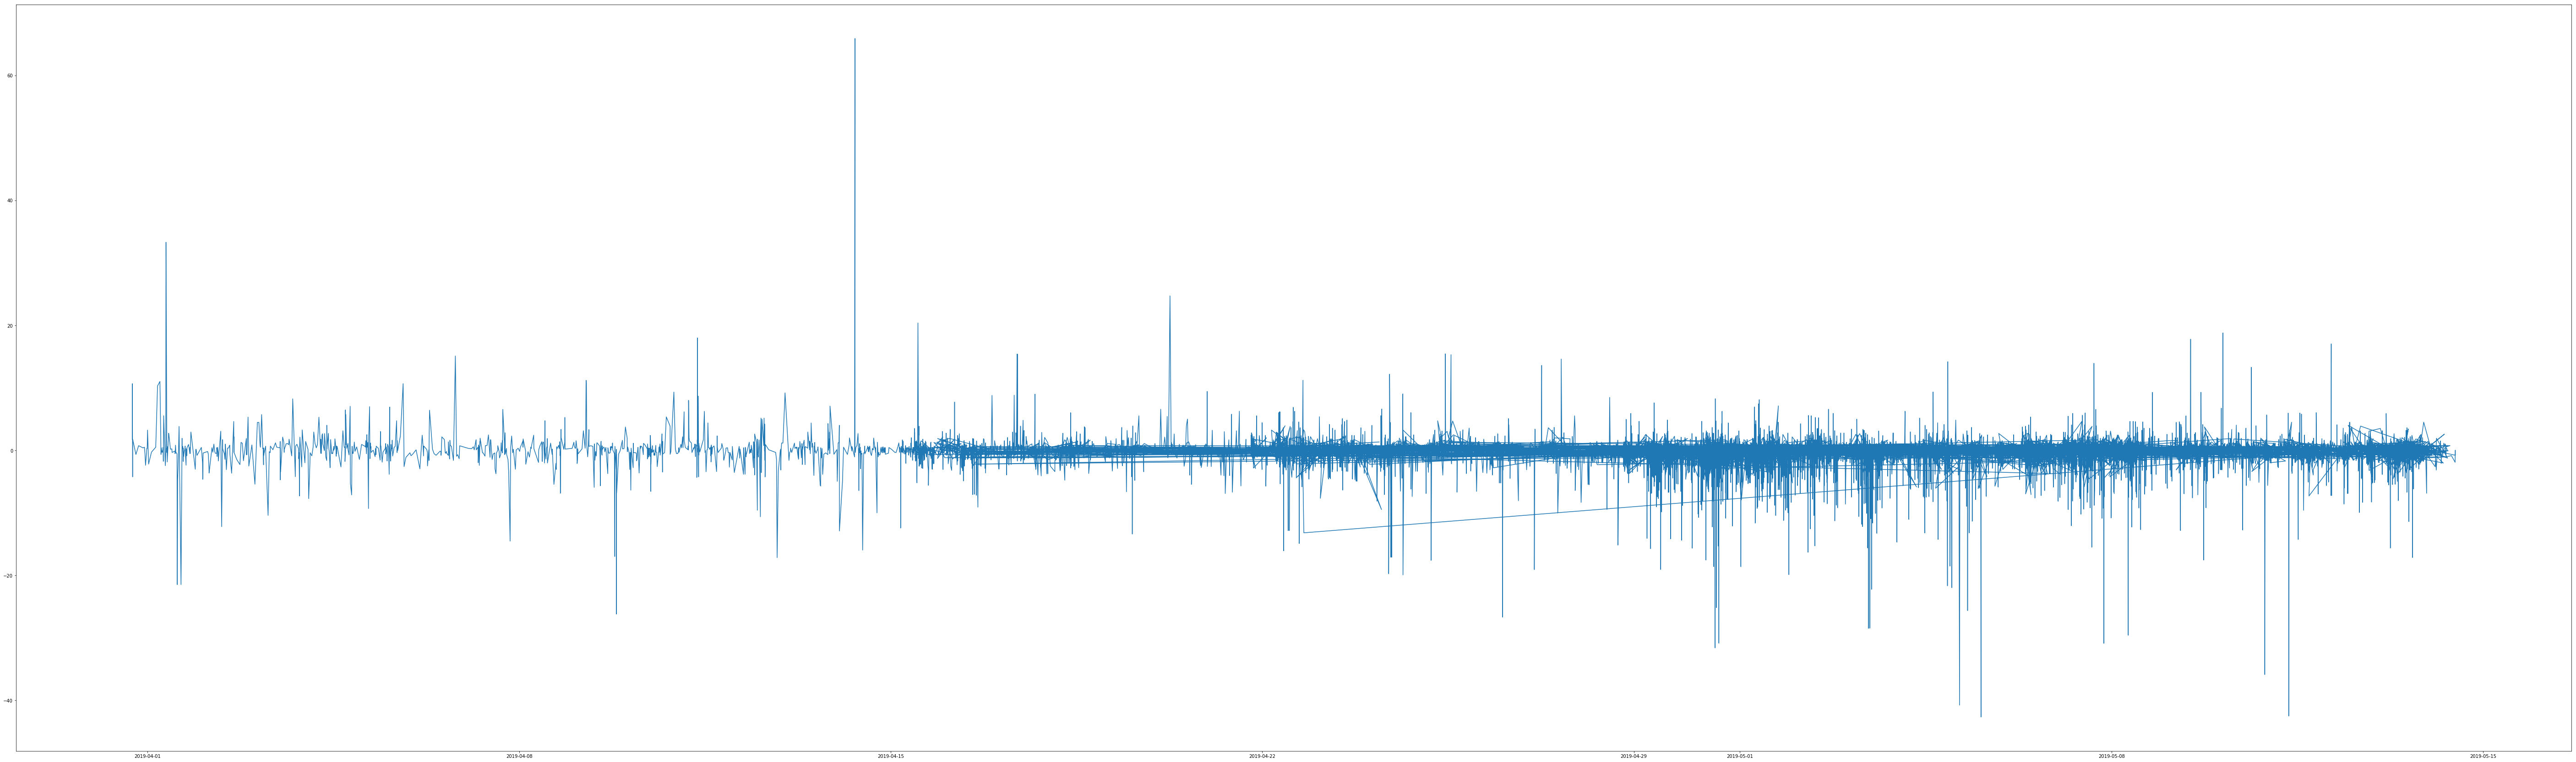

In [73]:
plt.figure(figsize=(100,30))
plt.plot(asoiaf['Publish Date'], asoiaf['sentiment_sum'])

In [141]:
mean_sentiment_a = asoiaf.groupby(by = 'publish_date').mean()
mean_sentiment_g = got.groupby(by = 'publish_date').mean()
mean_sentiment_f = freefolk.groupby(by = 'publish_date').mean()

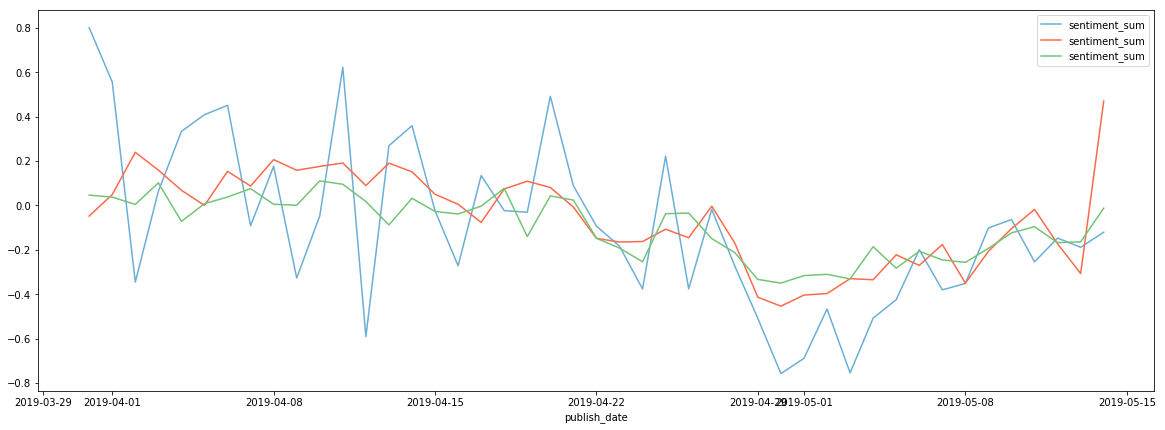

In [150]:
plt.figure(figsize=(20,7))
sns.lineplot(data = mean_sentiment_a, palette = 'Blues')
sns.lineplot(data = mean_sentiment_g, palette = 'Reds')
sns.lineplot(data = mean_sentiment_f, palette = 'Greens')

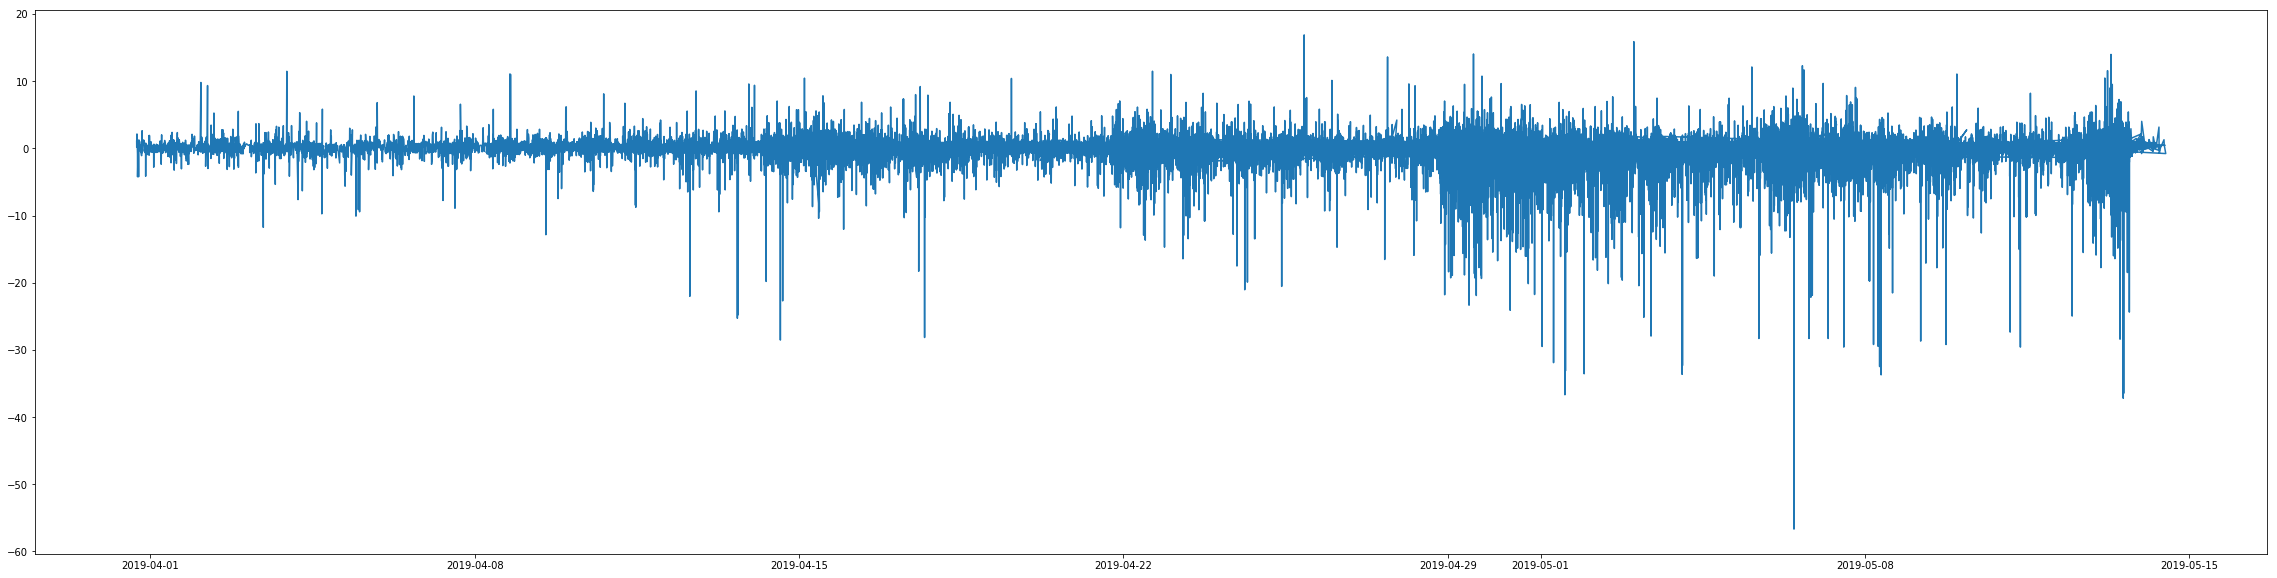

In [71]:
plt.figure(figsize=(40,10))
plt.plot(got['Publish Date'], got['sentiment_sum'])

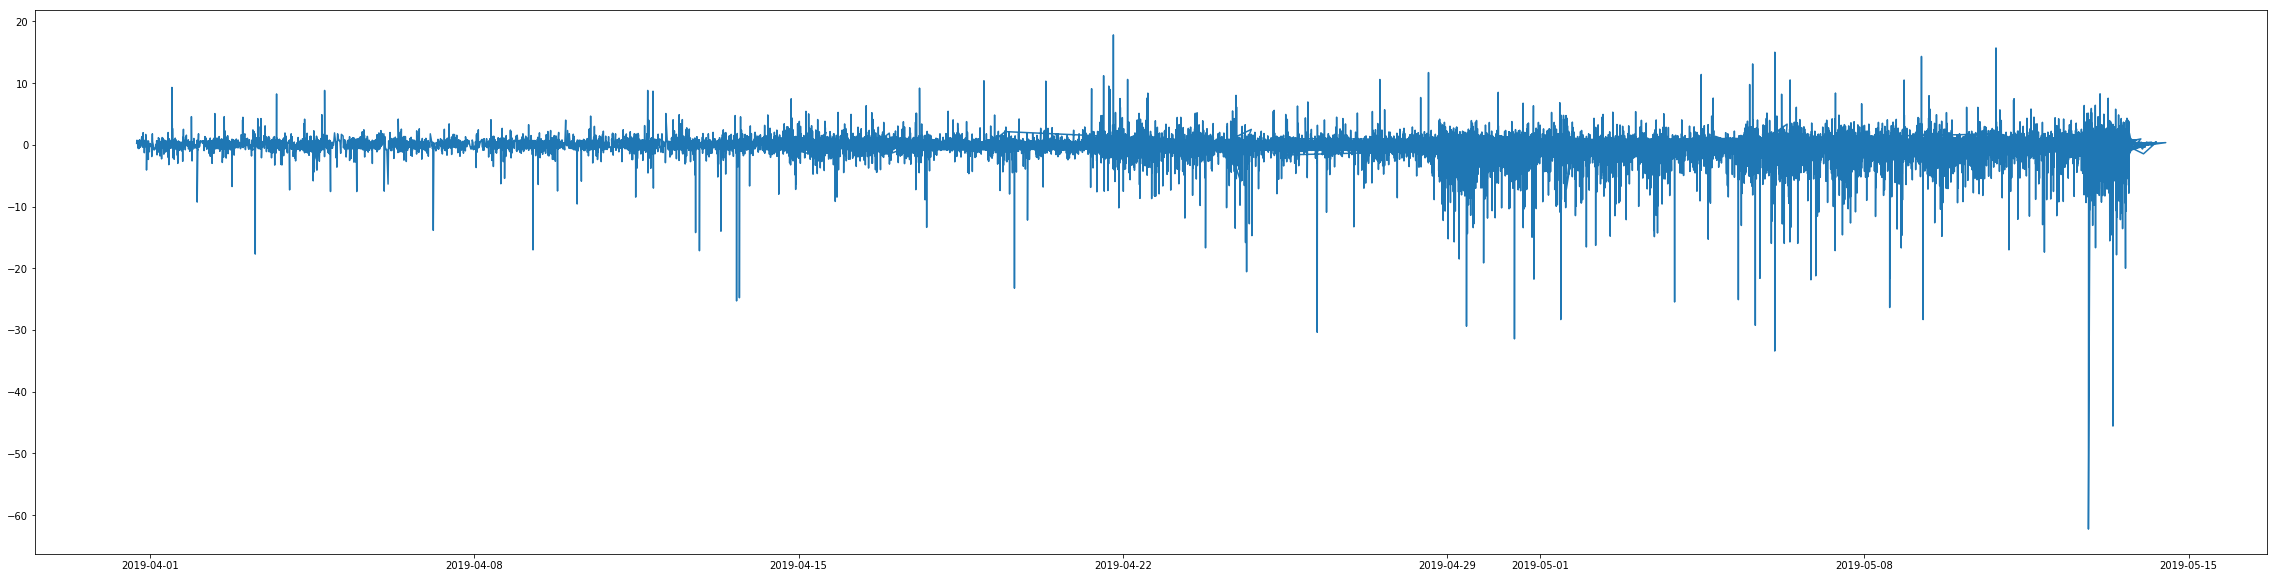

In [72]:
plt.figure(figsize=(40,10))
plt.plot(freefolk['Publish Date'], freefolk['sentiment_sum'])